<a href="https://colab.research.google.com/github/DeependraParichha1004/Codes/blob/main/Google_Brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img title="" alt="ventilator diagram" src="https://raw.githubusercontent.com/google/deluca-lung/main/assets/2020-10-02%20Ventilator%20diagram.svg" style="user-select: auto;">





In [1]:
import pandas as pd
import numpy as np

In [2]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')


In [92]:
train_set.isna().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [4]:
df_sel=train_set[(train_set['pressure']>2.638) & (train_set['pressure']<24.78)]
df_sel

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
460034,460035,9531,50,10,1.075398,0.000000,1,7.735650
460035,460036,9531,50,10,1.107040,0.000000,1,6.399909
460036,460037,9531,50,10,1.138719,0.000000,1,6.540513
460037,460038,9531,50,10,1.170342,0.000000,1,6.470211


In [5]:
train=train_set.fillna(0)
test=test_set.fillna(0)

In [93]:
train

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
460034,460035,9531,50,10,1.075398,0.000000,1,7.735650
460035,460036,9531,50,10,1.107040,0.000000,1,6.399909
460036,460037,9531,50,10,1.138719,0.000000,1,6.540513
460037,460038,9531,50,10,1.170342,0.000000,1,6.470211


In [7]:
Q3=train['pressure'].quantile(0.25)
Q1=train['pressure'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*(IQR))
upper_limit=Q1+(1.5*(IQR))

In [8]:
lower_limit,upper_limit

(24.78391990417188, 2.6387440870387895)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

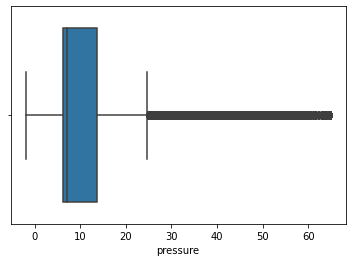

In [10]:
ax=sb.boxplot(x=train['pressure'])

In [11]:
train['C'].value_counts()

10    171879
50    152240
20    135920
Name: C, dtype: int64

In [49]:
test['u_out'].value_counts()

1.0    283726
0.0    173450
Name: u_out, dtype: int64

In [13]:
from palettable.scientific.sequential import Acton_14,Bamako_12

In [14]:
train['R'].unique()

array([20, 50,  5])

In [15]:
# def count_plot(col):
#   cat_tr=train[col].value_counts().index.astype(str)
#   val_tr=train[col].value_counts().values
#   cat_te=test[col].value_counts().index.astype(str)
#   val_te=test[col].value_counts().values
#   #fig,(ax1,ax2)=plt.subplots(figsize=(8,6),ncols=2)
#   # sb.axes_style("whitegrid")
#   # ax1=sb.barplot(x=cat_tr, y=val_tr,capsize=0.1,palette=pal)
#   # sb.axes_style("whitegrid")
#   # ax2=sb.barplot(x=cat_te, y=val_te,capsize=0.1,palette=pal)
#   # #ax.bar(cat,val,width=0.3)
#   plt.subplot(1,2,1)
#   plt.bar(cat_tr,val_tr,color=['yellowgreen', 'Purple', 'wheat'],width=0.6)
#   plt.subplot(1,2,2)
#   plt.bar(cat_te,val_te,color=['turquoise','skyblue','crimson'],width=0.8)
#   plt.tight_layout()
#   plt.show()

In [42]:
# def count_plot(col):
#   cat_tr=train[col].value_counts().index.astype(str)
#   val_tr=train[col].value_counts().values
#   cat_te=test[col].value_counts().index.astype(str)
#   val_te=test[col].value_counts().values
#   fig_1,(ax_1,ax_2)=plt.subplots(figsize=(10,6),ncols=2,nrows=1)

#   ax_1.bar(cat_tr,val_tr,color=['yellowgreen', 'Purple', 'wheat'],align='center',width=0.6)

#   ax_2.bar(cat_te,val_te,color=['turquoise','skyblue','crimson'],width=0.8)

import seaborn as sb
def count_plot(col1,col2):
  
  fig=plt.figure(figsize=(8,6))
  ax=sb.countplot(x=col1,hue=col2,linewidth=2,ec='k',data=train_set)


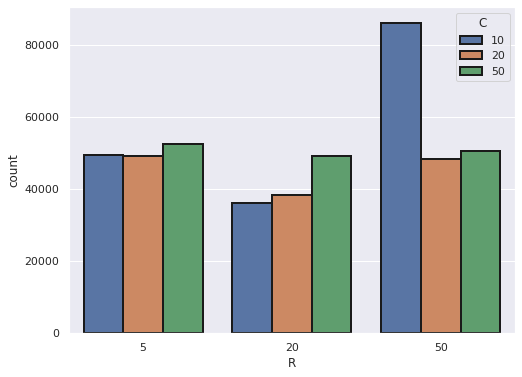

In [44]:
count_plot('R','C')

In [18]:
train.isna().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

[]

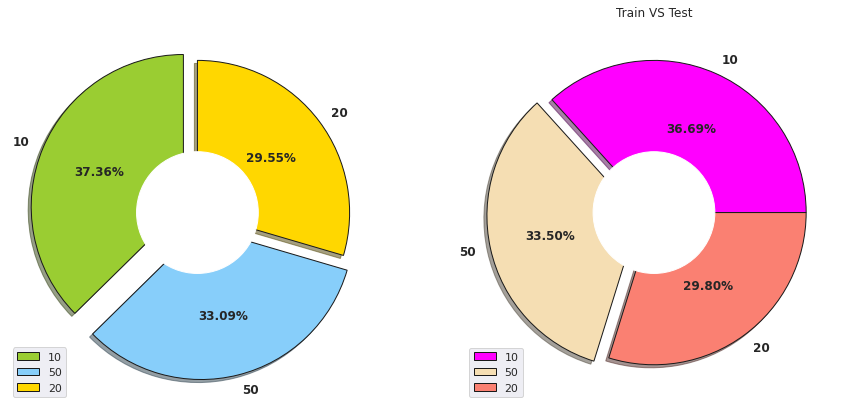

In [129]:
cat_c=train['C'].value_counts().index.astype(int)
val_c=train['C'].value_counts().values
cat_c1=test['C'].value_counts().index
val_c1=test['C'].value_counts().values
fig_1,(ax_1,ax_2)=plt.subplots(figsize=(15,8),ncols=2,nrows=1)

explode = (0.1, 0.1, 0) 
ax_1.pie(x=val_c,explode=explode,colors=['yellowgreen','lightskyblue','gold'],startangle=90,labels=cat_c,autopct='%1.2f%%',textprops={'fontweight':'bold','fontsize':12},wedgeprops={'linewidth':1,'edgecolor':'k'},shadow=True,pctdistance=0.6)
ax_1.add_artist(plt.Circle((0,0),0.4,fc="white"))

ax_1.legend(loc=3)

explode = (0, 0.1, 0) 
ax_2.pie(x=val_c1,explode=explode,colors=['magenta','wheat','salmon'],labels=cat_c1,autopct='%1.2f%%',textprops={'fontweight':'bold','fontsize':12},wedgeprops={'linewidth':1,'edgecolor':'k'},shadow=True,pctdistance=0.6)
ax_2.add_artist(plt.Circle((0,0),0.4,fc="white"))

ax_2.legend(loc=3)

ax_1.plot()

In [21]:
train_set.max()

id           460039.000000
breath_id      9531.000000
R                50.000000
C                50.000000
time_step         2.745190
u_in            100.000000
u_out             1.000000
pressure         64.820992
dtype: float64

In [32]:
train_set

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
460034,460035,9531,50,10,1.075398,0.000000,1,7.735650
460035,460036,9531,50,10,1.107040,0.000000,1,6.399909
460036,460037,9531,50,10,1.138719,0.000000,1,6.540513
460037,460038,9531,50,10,1.170342,0.000000,1,6.470211


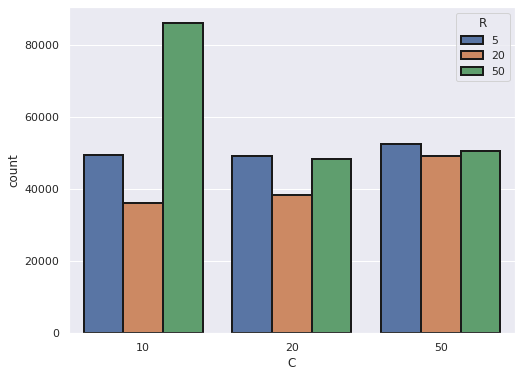

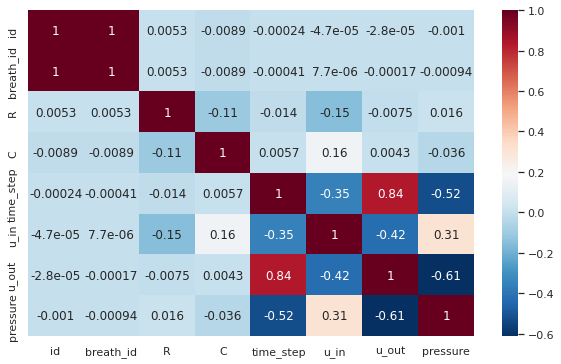

In [47]:
corr=train_set.corr('pearson')
fig=plt.figure(figsize=(10,6))
ax=sb.heatmap(corr,cmap='RdBu_r',annot=True)


In [70]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [86]:
df_sel

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
460034,460035,9531,50,10,1.075398,0.000000,1,7.735650
460035,460036,9531,50,10,1.107040,0.000000,1,6.399909
460036,460037,9531,50,10,1.138719,0.000000,1,6.540513
460037,460038,9531,50,10,1.170342,0.000000,1,6.470211


In [94]:
X=train.iloc[:,:-1].values
Y=train.iloc[:,-1].values

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [121]:
test

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0.0
1,2,0,5,20,0.031904,7.515046,0.0
2,3,0,5,20,0.063827,14.651675,0.0
3,4,0,5,20,0.095751,21.230610,0.0
4,5,0,5,20,0.127644,26.320956,0.0
...,...,...,...,...,...,...,...
457171,457172,14394,50,50,1.631394,2.526626,1.0
457172,457173,14394,50,50,1.663202,2.890301,1.0
457173,457174,14394,50,50,1.696038,3.209741,1.0
457174,457175,14394,50,50,1.727811,3.472706,1.0


In [110]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=64,criterion='squared_error')
rfr.fit(x_train,y_train)


RandomForestRegressor(n_estimators=64)

In [111]:
y_pred=rfr.predict(x_test)

In [112]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.7981788251303706

In [137]:
sample=pd.read_csv('sample_submission.csv')
ids=test_set['id']

In [134]:
pred=rfr.predict(test_set)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [132]:
ids

0              1
1              2
2              3
3              4
4              5
           ...  
711390    711391
711391    711392
711392    711393
711393    711394
711394       711
Name: id, Length: 711395, dtype: int64

In [135]:
pred.shape

(4024000,)

In [144]:
output=pd.DataFrame({'id':ids,'pressure':pred})
output.to_csv('submission_1.csv')
output

,id,pressure
0,1,5.797947
1,2,5.892415
2,3,7.279784
3,4,7.968525
4,5,9.651383
...,...,...
4023995,4023996,6.118700
4023996,4023997,6.069269
4023997,4023998,6.056087
4023998,4023999,6.014346


In [133]:
test_set=pd.read_csv('test.csv')
test_set

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.530117,4.971245,1
4023996,4023997,125748,20,10,2.563853,4.975709,1
4023997,4023998,125748,20,10,2.597475,4.979468,1
4023998,4023999,125748,20,10,2.631134,4.982648,1
